### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Importing Data

In [2]:
data = pd.read_csv("TaxiFare.csv")

### Cleaning Data

In [3]:
data['date_time_of_pickup'] = pd.to_datetime(data['date_time_of_pickup'])
data['day'] = data['date_time_of_pickup'].dt.day
data['month'] = data['date_time_of_pickup'].dt.month
data['year'] = data['date_time_of_pickup'].dt.year

In [4]:
x = data.drop(columns=['unique_id', 'date_time_of_pickup', 'amount'], axis=1)
y = data['amount']

### Splitting Dataset into train and test subsets

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

### Using Random Forest Regressor

In [6]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

### Metrics

In [7]:
from sklearn.metrics import r2_score, mean_squared_error
acc = r2_score(y_test, y_pred) * 100
print("Accuracy is {}%".format(round(acc,2)))
print("Mean Squared Error is {}%".format(round(mean_squared_error(y_test, y_pred),2)))

Accuracy is 78.59%
Mean Squared Error is 18.5%


### Actual vs Predicted Values

In [8]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(df.head(10))

       Actual  Predicted
11841     6.5     8.1420
19602    13.3    12.2470
45519     5.3     5.5160
25747     6.5     7.0100
42642    25.3    25.7152
31902     8.5     8.2000
30346     5.3     6.3130
12363     7.3     6.9740
32490     5.3     6.1040
26128     4.9     5.0550


### Visualising Feature Importances

In [9]:
print(regr.feature_importances_)

[0.24291073 0.12092606 0.39419376 0.16117796 0.00779236 0.02421987
 0.02044717 0.02833209]


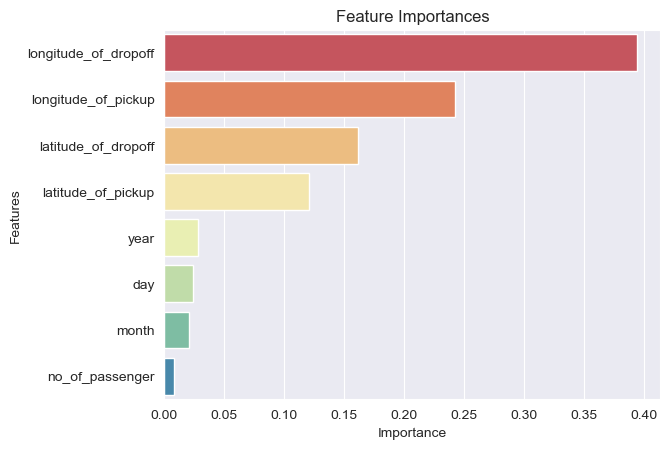

In [10]:
sorted_idx=regr.feature_importances_.argsort()[::-1]
y_values = list(x.columns[sorted_idx])
sns.barplot(x=regr.feature_importances_[sorted_idx], y=y_values, palette="Spectral")
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

### Using GridSearchCV for hyperparameter tuning

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid= {'max_features': ['auto', 'sqrt'],
             'max_depth': [None,1,10],
             'min_samples_split': [2,5,8,10],
             'min_samples_leaf': [1, 2, 4, 6],
             'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=20), param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)  

In [12]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=20), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 1, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 8, 10]},
             scoring='neg_mean_squared_error')

In [13]:
print(grid_search.best_params_)

{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8}


In [14]:
grid_predictions = grid_search.predict(x_test)
acc = r2_score(y_test, grid_predictions) * 100
print("Accuracy is {}%".format(round(acc,2)))
print("Mean Squared Error is {}%".format(round(mean_squared_error(y_test, grid_predictions),2)))

Accuracy is 78.12%
Mean Squared Error is 18.91%


### Using RandomizedSearchCV for hyperparameter tuning

In [15]:
from sklearn.model_selection import RandomizedSearchCV
param_grid= {'max_features': ['auto', 'sqrt'],
             'max_depth': [None,1,5],
             'min_samples_split': [2,5,8,10],
             'min_samples_leaf': [1, 2, 4, 6],
             'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=40), param_distributions=param_grid,
n_iter = 100, scoring='neg_mean_squared_error', cv=3, verbose=2, random_state=40,n_jobs=-1)  

In [16]:
random_search.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2; total time=  10.9s
[CV] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10; tota

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=40),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 1, 5],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 8, 10]},
                   random_state=40, scoring='neg_mean_squared_error',
                   verbose=2)

In [17]:
print(random_search.best_params_)

{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [18]:
random_predictions = random_search.predict(x_test)
acc = r2_score(y_test, random_predictions) * 100
print("Accuracy is {}%".format(round(acc,2)))
print("Mean Squared Error is {}%".format(round(mean_squared_error(y_test, random_predictions),2)))

Accuracy is 78.28%
Mean Squared Error is 18.77%
